##### Naive Bayes Model for this kind of problem gives us speedy training of datasets. Naive Bayes models are easy to interpret and understand. The probabilistic nature of the model allows for straightforward interpretation of feature importance and contribution to the target variable. However, Naive Bayes assumes that all features are independent of each other given the target variable. This assumption may not hold true in real-world scenarios, which can limit the model's predictive accuracy.

In [61]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix, accuracy_score
from imblearn.over_sampling import RandomOverSampler

In [3]:
# Load the dataset
data = pd.read_csv('application_train.csv')

In [4]:
# Count the number of columns using the shape attribute
num_rows = data.shape[0]
print("Number of columns:", num_rows)

Number of columns: 307511


##### Counting the number of columns using the shape attribute helps in understanding the dataset's structure and size, which can provide insights into the data's complexity and dimensionality, aiding in subsequent analysis and modeling decisions.

In [5]:
# Check for missing values
missing_values = data.isnull().sum()
print("Missing Values:")
print(missing_values)

Missing Values:
SK_ID_CURR                        0
TARGET                            0
NAME_CONTRACT_TYPE                0
CODE_GENDER                       0
FLAG_OWN_CAR                      0
                              ...  
AMT_REQ_CREDIT_BUREAU_DAY     41519
AMT_REQ_CREDIT_BUREAU_WEEK    41519
AMT_REQ_CREDIT_BUREAU_MON     41519
AMT_REQ_CREDIT_BUREAU_QRT     41519
AMT_REQ_CREDIT_BUREAU_YEAR    41519
Length: 122, dtype: int64


##### Checking for missing values is crucial for the Home Credit problem as it allows identifying and quantifying the extent of missing data. This information is essential for determining appropriate strategies to handle missing values, such as imputation or exclusion.

In [6]:
# Drop columns with excessive missing values
missing_threshold = 0.5  # Drop columns with more than 50% missing values
columns_to_drop = missing_values[missing_values > missing_threshold * len(data)].index
data = data.drop(columns_to_drop, axis=1)

##### This code chunk drops columns that have a high percentage of missing values, which is necessary to eliminate irrelevant or unreliable features that may hinder the model's ability to learn meaningful patterns and make accurate predictions.

In [7]:
# Separate features and target variable
X = data.drop('TARGET', axis=1)
y = data['TARGET']

In [8]:
# Handle missing numeric values with mean
numeric_cols = X.select_dtypes(include=['float64', 'int64']).columns
X[numeric_cols] = X[numeric_cols].fillna(X[numeric_cols].mean())

##### Filling missing numeric values with the mean ensures a complete dataset for model training. It helps to retain the statistical properties of the data and avoids biasing the model towards any specific value or range.

In [9]:
# Handle missing categorical values with a new category 'NA'
categorical_cols = X.select_dtypes(include=['object']).columns
X[categorical_cols] = X[categorical_cols].fillna('NA')

##### Replacing missing categorical values with a new category ('NA') ensures that missingness is treated as a distinct category in the dataset, preventing the loss of information due to missing values during subsequent analysis and modeling stages.

In [10]:
# Perform one-hot encoding for categorical variables
X = pd.get_dummies(X)

##### One-hot encoding categorical variables is necessary as many machine learning algorithms, including Naive Bayes, require numerical inputs. This encoding technique transforms categorical variables into binary columns, enabling the model to process and learn from categorical data effectively.

In [11]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [82]:
# Balance the class distribution using oversampling
oversampler = RandomOverSampler(random_state=42)
X_resampled, y_resampled = oversampler.fit_resample(X_train, y_train)

##### This code chunk performs oversampling on the training data to address class imbalance. It generates synthetic samples from the minority class to increase its representation and ensure a more balanced distribution between the classes. This helps to mitigate the bias towards the majority class and improve the performance of the model in handling imbalanced data.

In [83]:
# Define the parameter grid for hyperparameter tuning
param_grid = {
    'var_smoothing': np.logspace(-9, 0, num=10)
}

##### This code defines a parameter grid for hyperparameter tuning in the form of a dictionary. It specifies the range of values for the 'var_smoothing' hyperparameter, which will be explored during the hyperparameter search to find the optimal value that maximizes the model's performance.

In [84]:
# Create and train a Naive Bayes model
naive_bayes = GaussianNB()

In [85]:
# Perform grid search for hyperparameter tuning
grid_search = GridSearchCV(naive_bayes, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_resampled, y_resampled)

GridSearchCV(cv=5, estimator=GaussianNB(),
             param_grid={'var_smoothing': array([1.e-09, 1.e-08, 1.e-07, 1.e-06, 1.e-05, 1.e-04, 1.e-03, 1.e-02,
       1.e-01, 1.e+00])},
             scoring='accuracy')

##### Performs grid search with cross-validation to systematically search for the best hyperparameters for the Naive Bayes model. It explores different combinations of hyperparameters defined in the 'param_grid' and evaluates their performance using the accuracy metric. The outcome is the best set of hyperparameters that optimize the model's accuracy on the training data. I wanted to point out what does these lines of codes do: 'cv=5': The number of cross-validation folds to be used during the grid search. In this case, 5-fold cross-validation is performed. 'scoring='accuracy'': The evaluation metric used to assess the performance of different parameter combinations. Here, the accuracy score is used.

In [86]:
# Get the best hyperparameters and model
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

In [87]:
# Make predictions on the testing data with the best model
y_pred = best_model.predict(X_test)

In [66]:
# Make predictions on the testing data with the best model
y_pred = best_model.predict(X_test)

In [88]:
# Calculate accuracy of the Naive Bayes model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.4441571955839553


##### This accuracy shows how poor this model performed even after the performance of grid search for hyperparameter tuning. This will also reflect on the model for test data set.

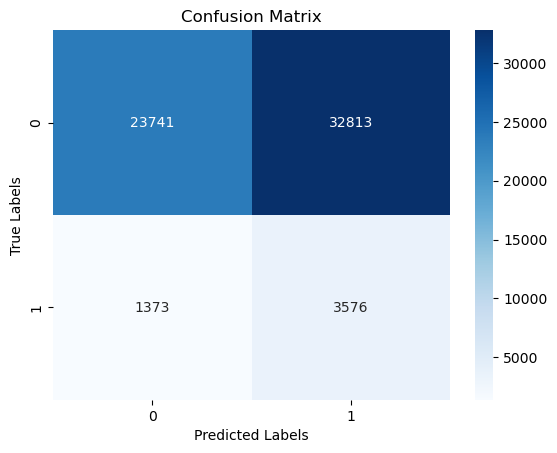

In [89]:
# Create a confusion matrix
confusion_mat = confusion_matrix(y_test, y_pred)
sns.heatmap(confusion_mat, annot=True, cmap='Blues', fmt='d')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

In [90]:
# Preprocess the test data similar to the training data
test_data = pd.read_csv('application_test.csv')

In [91]:
# Drop columns with excessive missing values
test_data = test_data.drop(columns_to_drop, axis=1)

In [92]:
# Handle missing numeric values with mean
test_data[numeric_cols] = test_data[numeric_cols].fillna(test_data[numeric_cols].mean())

In [93]:
# Handle missing categorical values with a new category 'NA'
test_data[categorical_cols] = test_data[categorical_cols].fillna('NA')

In [94]:
# Perform one-hot encoding for categorical variables
test_data = pd.get_dummies(test_data)

In [95]:
# Align test data columns with training data columns
missing_cols = set(X.columns) - set(test_data.columns)
for col in missing_cols:
    test_data[col] = 0
test_data = test_data[X.columns]

In [96]:
# Make predictions on the test data using the best model
y_pred_test = best_model.predict(test_data)

In [97]:
# Create a DataFrame with the 'SK_ID_CURR' column and predictions
submission_df = pd.DataFrame({
    'SK_ID_CURR': test_data['SK_ID_CURR'],
    'TARGET': y_pred_test
})

In [98]:
# Save the DataFrame to a CSV file
submission_df.to_csv('NBsubmissionv5.csv', index=False)

##### This model got a .57276 private score from Kaggle. This is not the ideal model to be used in this type of problem.